# Surgical Instrument Detection and Segmentation

In [13]:
import torch, torchvision

import detectron2
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

import matplotlib.pyplot as plt
import random
import cv2
import os

In [2]:
register_coco_instances("instruments", {}, "data/annotations.json", "data/images")

In [3]:
meta_data = MetadataCatalog.get("instruments")
dataset_dicts = DatasetCatalog.get("instruments")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



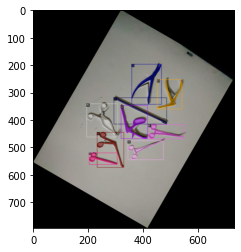

In [4]:
for d in random.sample(dataset_dicts, 21):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=meta_data, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image())

# Training

In [8]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("instruments",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "checkpoints/model_final.pth"  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  

In [11]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/30 13:29:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

WARNING [04/30 13:29:01 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/30 13:29:01 d2.data.datasets.coco]: Loaded 403 images in COCO format from data/annotations.json
[04/30 13:29:01 d2.data.build]: Removed 0 images with no usable annotations. 403 images left.
[04/30 13:29:01 d2.data.build]: Distribution of instances among all 8 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|     t1     | 429          |     t2     | 208          |     t3     | 208          |
|     t4     | 208          |     t5     | 208          |     t6     | 208          |
|     t7     | 208          |     t8     | 221          |            |              |
|   total    | 1898         |            |              |            |              |
[04/30 13:29:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations

/home/anirudh/.pyenv/versions/3.7.4/envs/detectron/lib/python3.7/site-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/anirudh/.pyenv/versions/3.7.4/envs/detectron/lib/python3.7/site-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/anirudh/.pyenv/versions/3.7.4/envs/detectron/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider 

[04/30 13:29:05 d2.utils.events]:  eta: 0:03:04  iter: 19  total_loss: 0.2364  loss_cls: 0.04583  loss_box_reg: 0.1074  loss_mask: 0.06986  loss_rpn_cls: 0.0002473  loss_rpn_loc: 0.01569  time: 0.2050  data_time: 0.0309  lr: 4.9953e-06  max_mem: 2581M
[04/30 13:29:09 d2.utils.events]:  eta: 0:02:45  iter: 39  total_loss: 0.2404  loss_cls: 0.04951  loss_box_reg: 0.108  loss_mask: 0.06885  loss_rpn_cls: 0.0001871  loss_rpn_loc: 0.009284  time: 0.1840  data_time: 0.0043  lr: 9.9902e-06  max_mem: 2581M
[04/30 13:29:11 d2.engine.hooks]: Overall training speed: 51 iterations in 0:00:09 (0.1837 s / it)
[04/30 13:29:11 d2.engine.hooks]: Total training time: 0:00:09 (0:00:00 on hooks)
[04/30 13:29:11 d2.utils.events]:  eta: 0:02:42  iter: 53  total_loss: 0.2245  loss_cls: 0.0409  loss_box_reg: 0.0968  loss_mask: 0.06752  loss_rpn_cls: 0.0002266  loss_rpn_loc: 0.01001  time: 0.1806  data_time: 0.0046  lr: 1.3237e-05  max_mem: 2581M


KeyboardInterrupt: 

# Inference

In [14]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "checkpoints/model_final.pth"  

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ("l_t", )
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8 
predictor = DefaultPredictor(cfg)

In [17]:
def image_vis(im,predictor):
    plt.imshow(im[:, :, ::-1])
    plt.show()
    outputs = predictor(im) 
    v = Visualizer(im[:, :, ::-1],
                   metadata=meta_data, 
                   scale=0.5)          

    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    o_img = out.get_image()
    plt.imshow(o_img)

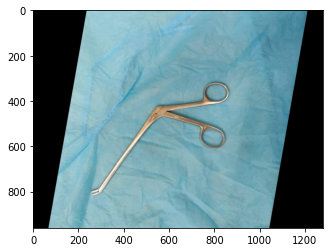

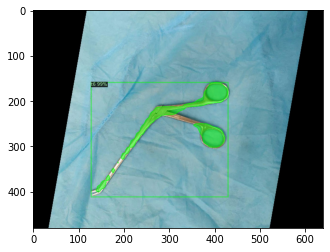

In [19]:
img = cv2.imread("images/sample2.jpg")
image_vis(img,predictor)

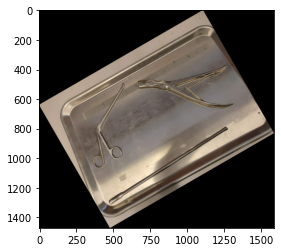

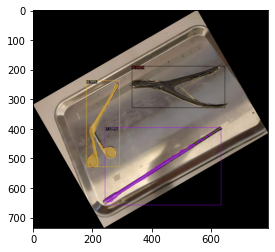

In [20]:
img = cv2.imread("images/sample1.jpg")
image_vis(img,predictor)

# Testing

In [25]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

In [ ]:
register_coco_instances("test", {}, "data/test/annotations.json", "data/test/test_images")

In [23]:
test_metadata = MetadataCatalog.get("test")
dataset_dicts = DatasetCatalog.get("test")

WARNING [04/30 13:51:37 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/30 13:51:37 d2.data.datasets.coco]: Loaded 105 images in COCO format from data/test/annotations.json


In [26]:
evaluator = COCOEvaluator("test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [04/30 13:53:06 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [04/30 13:53:06 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/30 13:53:06 d2.data.datasets.coco]: Loaded 105 images in COCO format from data/test/annotations.json
[04/30 13:53:06 d2.data.build]: Distribution of instances among all 8 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|     t1     | 210          |     t2     | 105          |     t3     | 105          |
|     t4     | 105          |     t5     | 105          |     t6     | 105          |
|     t7     | 84           |     t8     | 105          |            |              |
|   total    | 924          |            |              |            |     

OrderedDict([('bbox',
              {'AP': 89.40203191067812,
               'AP50': 99.84338973339406,
               'AP75': 99.7184461481704,
               'APs': nan,
               'APm': 90.89743157989268,
               'APl': 89.3866856312364,
               'AP-t1': 89.78302284377206,
               'AP-t2': 89.17701135583448,
               'AP-t3': 88.02701597528211,
               'AP-t4': 87.71172600127647,
               'AP-t5': 89.68529226636555,
               'AP-t6': 89.35556713566093,
               'AP-t7': 90.94690917155751,
               'AP-t8': 90.5297105356758}),
             ('segm',
              {'AP': 45.820550889518564,
               'AP50': 90.10693035072347,
               'AP75': 40.505592916789205,
               'APs': nan,
               'APm': 44.22512058367926,
               'APl': 55.11110958655727,
               'AP-t1': 67.22888131174892,
               'AP-t2': 48.38721125911431,
               'AP-t3': 16.010064117088206,
               